# Ecommerce text classification dataset

In [158]:
from collections import Counter
import warnings

# Gestione dei file di sistema
import time, psutil, os

# Manipolazione dei dati
import numpy as np
import pandas as pd

# Plot e visualizzazione
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_theme()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# NLP
import string, re, nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from num2words import num2words
from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.stem import WordNetLemmatizer

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Scipy
import scipy
from scipy import sparse
from scipy.sparse import csr_matrix

# Train-test split e cross validation
from sklearn.model_selection import train_test_split, ParameterGrid

# Classificatori
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Il resto
import json
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import TruncatedSVD

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\StefanoCarobene\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\StefanoCarobene\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\StefanoCarobene\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Analisi dati e grafici

### analisi primaria really simple

In [113]:
df = pd.read_csv(fr"esplorazione_dati.csv", 
    names = ['categoria', 'caratteristiche'])

In [114]:
# pd.set_option('display.max_rows', None)
df.head()

categoria                                    caratteristiche
0  Household  Paper Plane Design Framed Wall Hanging Motivat...
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...
4  Household  Incredible Gifts India Wooden Happy Birthday U...

In [115]:
df.describe()

categoria                                    caratteristiche
count       50425                                              50424
unique          4                                              27802
top     Household  Think & Grow Rich About the Author NAPOLEON HI...
freq        19313                                                 30

In [116]:
df.head()

categoria                                    caratteristiche
0  Household  Paper Plane Design Framed Wall Hanging Motivat...
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...
4  Household  Incredible Gifts India Wooden Happy Birthday U...

In [117]:
# quanti prodotti ci sono per categoria?
df.groupby('categoria').count()

caratteristiche
categoria                              
Books                             11820
Clothing & Accessories             8670
Electronics                       10621
Household                         19313

In [118]:
print(pd.Series({"Numero di osservaazioni con valori mancanti: ": len(df) - len(df.dropna()),
                 "Numero di duplicati: ": df.duplicated().sum()}).to_string())

Numero di osservaazioni con valori mancanti:         1
Numero di duplicati:                             22622


In [119]:
df.dropna(inplace = True) # Droppiamo le osservazioni con valori mancanti
df.drop_duplicates(inplace = True) # Droppiamo le osservazioni con duplicati
df.reset_index(drop = True, inplace = True) 

In [120]:
df.describe()

categoria                                    caratteristiche
count       27802                                              27802
unique          4                                              27802
top     Household  Paper Plane Design Framed Wall Hanging Motivat...
freq        10564                                                  1

In [121]:
df['categoria'].unique()

array(['Household', 'Books', 'Clothing & Accessories', 'Electronics'],
      dtype=object)

In [122]:
# quanti prodotti ci sono per categoria?
df.groupby('categoria').count()

caratteristiche
categoria                              
Books                              6256
Clothing & Accessories             5674
Electronics                        5308
Household                         10564

In [123]:
categoria_dizz = {'Electronics': 0, 'Household': 1, 'Books': 2, 'Clothing & Accessories': 3}
df.replace({'categoria': categoria_dizz}, inplace = True)

### Varie analisi con grafici

#### Grafici sulle parole più utilizzate

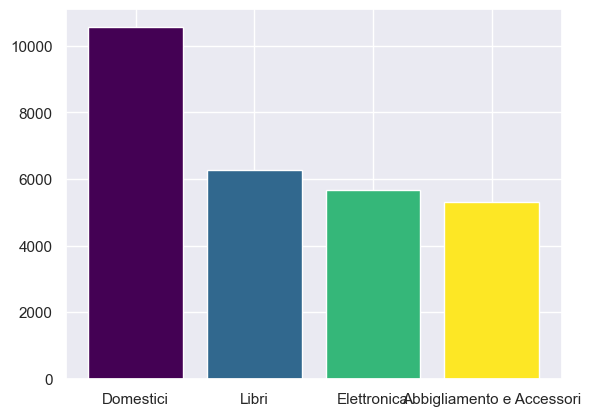

In [124]:
# Crea il grafico a barre
warnings.filterwarnings('ignore')
etichette = ['Domestici', 'Libri', 'Elettronica', 'Abbigliamento e Accessori']
valori = df['categoria'].value_counts()
# Crea una mappa di colori (colormap)
colormap = plt.cm.get_cmap('viridis')

# Crea il grafico a barre con colori personalizzati
plt.bar(range(len(valori)), valori, color=colormap(np.linspace(0, 1, len(valori))))

# Imposta le etichette dell'asse x
plt.xticks(range(len(valori)), etichette)

# Mostra il grafico
plt.show()


In [125]:
data_e = df[df['categoria'] == 0] # Elettronici
data_d = df[df['categoria'] == 1] # Domestici
data_l = df[df['categoria'] == 2] # Libri
data_a = df[df['categoria'] == 3] # Abbigliamento ed Accessori

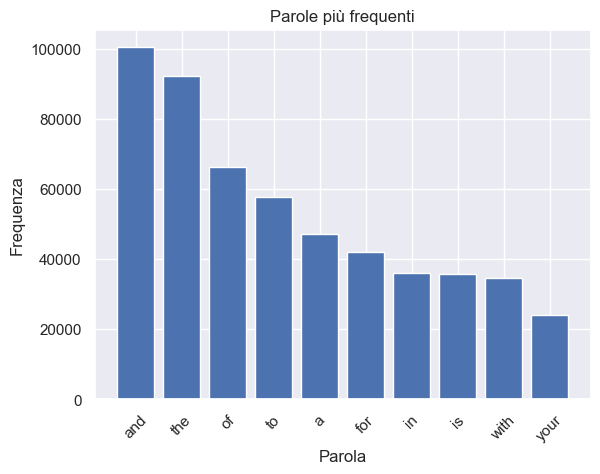

In [126]:
column_words = 'caratteristiche'  # Sostituisci 'nome_colonna' con il nome della colonna del DataFrame contenente le stringhe
all_words = ' '.join(df[column_words]).split()
word_counts = Counter(all_words)
top_n = 10  # Sostituisci con il numero desiderato di parole da plottare
top_words = dict(word_counts.most_common(top_n))
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Parola')
plt.ylabel('Frequenza')
plt.title('Parole più frequenti')
plt.xticks(rotation=45)
plt.show()

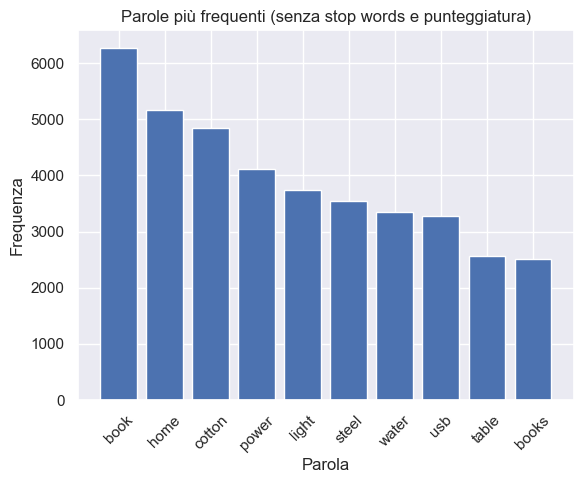

In [127]:
column_words = 'caratteristiche'
all_words = ' '.join(df[column_words]).lower()
all_words = re.sub(r'[^a-zA-Z0-9\s]', '', all_words)

tokens = word_tokenize(all_words)

stop_words = set(stopwords.words('english'))
# Aggiungo parola x e y e use alla lista di stop words
stop_words.update(['x', 'y', 'use', '1', 'fabric', 'products', 'stainless', 'years', 'makes', 'fit', 'set', 'white', 'wear', 'style', 'soft', 'look', 'long', 'life', 'design', 'material', 'designed', 'features', 'make', 'comes', 'used', 'author', 'black', 'color', 'high', 'best', 'made', 'one', 'quality', 'easy', 'perfect', 'product', 'also', 'size', 'two', 'new', 'first', 'many', 'well', 'great', 'good', 'like', 'would', 'get', 'much', 'even', 'time', 'could', 'bought', 'back', 'still', 'little', 'really', 'bought', 'back', 'still', 'litt'])
# aggiungi anche tutti i numeri in generale
stop_words.update([str(i) for i in range(0, 1000)])
filtered_tokens = [word for word in tokens if word not in stop_words]

word_counts = Counter(filtered_tokens)

top_n = 10
top_words = dict(word_counts.most_common(top_n))
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Parola')
plt.ylabel('Frequenza')
plt.title('Parole più frequenti (senza stop words e punteggiatura)')
plt.xticks(rotation=45)
plt.show()

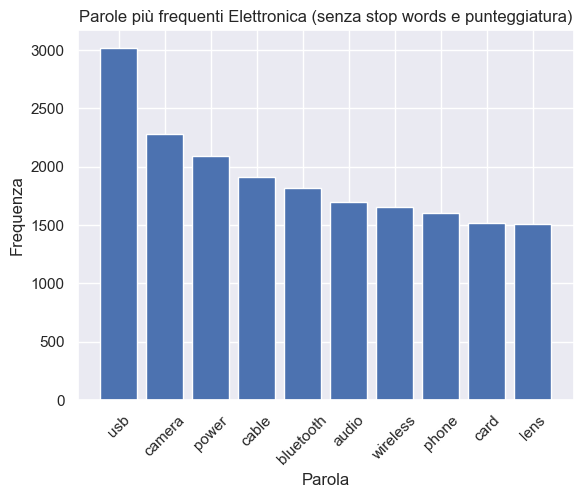

In [128]:
# elettronica

column_words = 'caratteristiche'
all_words = ' '.join(data_e[column_words]).lower()
all_words = re.sub(r'[^a-zA-Z0-9\s]', '', all_words)

tokens = word_tokenize(all_words)

stop_words = set(stopwords.words('english'))
# Aggiungo parola x e y e use alla lista di stop words
stop_words.update(['x', 'y', 'use', '1', 'set', 'made', 'high', 'black', 'one', 'product', 'also', 'size', 'two', 'new', 'first', 'many', 'well', 'great', 'good', 'like', 'would', 'get', 'much', 'even', 'time', 'could', 'bought', 'back', 'still', 'little', 'really', 'bought', 'back', 'still', 'litt'])
# aggiungi anche tutti i numeri in generale
stop_words.update([str(i) for i in range(0, 1000)])
filtered_tokens = [word for word in tokens if word not in stop_words]

word_counts = Counter(filtered_tokens)

top_n = 10
top_words = dict(word_counts.most_common(top_n))
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Parola')
plt.ylabel('Frequenza')
plt.title('Parole più frequenti Elettronica (senza stop words e punteggiatura)')
plt.xticks(rotation=45)
plt.show()

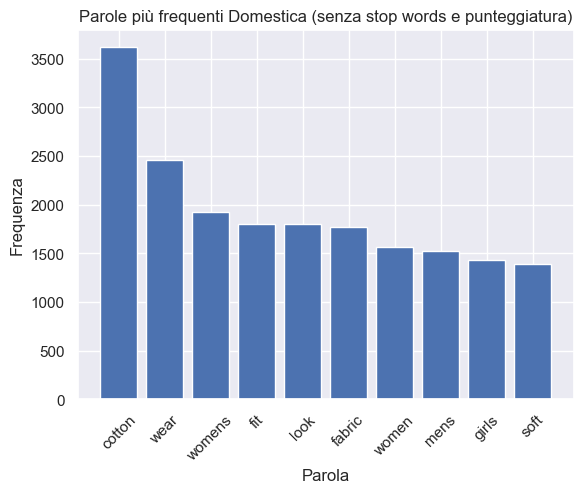

In [129]:
# Domestici

column_words = 'caratteristiche'
all_words = ' '.join(data_a[column_words]).lower()
all_words = re.sub(r'[^a-zA-Z0-9\s]', '', all_words)

tokens = word_tokenize(all_words)

stop_words = set(stopwords.words('english'))
# Aggiungo parola x e y e use alla lista di stop words
stop_words.update(['x', 'y', 'use', '1', 'set', 'durable', 'used', 'makes', 'best', 'storage', 'features', 'long', 'air', 'designed', 'clean', 'water', 'steel', 'finish', 'cm', 'products', 'stainless', 'white', 'comes', 'make', 'perfect', 'plastic', 'material', 'quality', 'design', 'color', 'easy', 'made', 'high', 'black', 'one', 'product', 'also', 'size', 'two', 'new', 'first', 'many', 'well', 'great', 'good', 'like', 'would', 'get', 'much', 'even', 'time', 'could', 'bought', 'back', 'still', 'little', 'really', 'bought', 'back', 'still', 'litt'])
# aggiungi anche tutti i numeri in generale
stop_words.update([str(i) for i in range(0, 1000)])
filtered_tokens = [word for word in tokens if word not in stop_words]

word_counts = Counter(filtered_tokens)

top_n = 10
top_words = dict(word_counts.most_common(top_n))
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Parola')
plt.ylabel('Frequenza')
plt.title('Parole più frequenti Domestica (senza stop words e punteggiatura)')
plt.xticks(rotation=45)
plt.show()

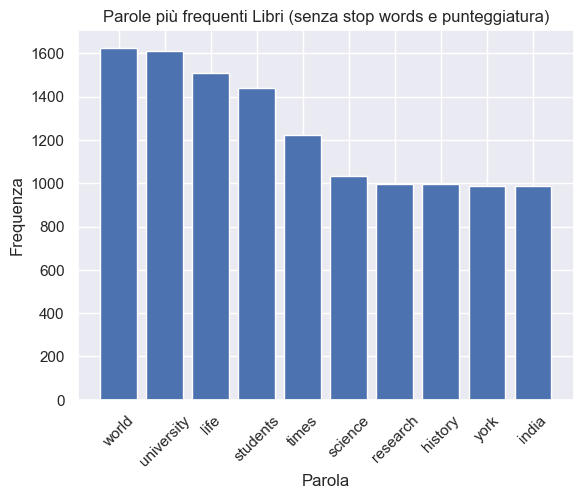

In [130]:
# Libri

column_words = 'caratteristiche'
all_words = ' '.join(data_l[column_words]).lower()
all_words = re.sub(r'[^a-zA-Z0-9\s]', '', all_words)

tokens = word_tokenize(all_words)

stop_words = set(stopwords.words('english'))
# Aggiungo parola x e y e use alla lista di stop words
stop_words.update(['x', 'y', 'use', '1', 'set', 'read', 'work', 'used', 'content', 'book', 'books', 'us', 'years', 'best', 'author', 'word', 'review', 'features', 'long', 'air', 'designed', 'clean', 'water', 'steel', 'finish', 'cm', 'products', 'stainless', 'white', 'comes', 'make', 'perfect', 'plastic', 'material', 'quality', 'design', 'color', 'easy', 'made', 'high', 'black', 'one', 'product', 'also', 'size', 'two', 'new', 'first', 'many', 'well', 'great', 'good', 'like', 'would', 'get', 'much', 'even', 'time', 'could', 'bought', 'back', 'still', 'little', 'really', 'bought', 'back', 'still', 'litt'])
# aggiungi anche tutti i numeri in generale
stop_words.update([str(i) for i in range(0, 1000)])
filtered_tokens = [word for word in tokens if word not in stop_words]

word_counts = Counter(filtered_tokens)

top_n = 10
top_words = dict(word_counts.most_common(top_n))
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Parola')
plt.ylabel('Frequenza')
plt.title('Parole più frequenti Libri (senza stop words e punteggiatura)')
plt.xticks(rotation=45)
plt.show()

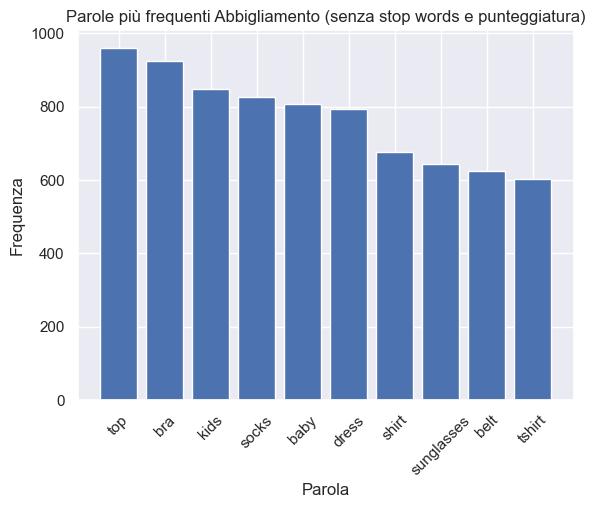

In [131]:
# Abbigliamento ed accessori

column_words = 'caratteristiche'
all_words = ' '.join(data_a[column_words]).lower()
all_words = re.sub(r'[^a-zA-Z0-9\s]', '', all_words)

tokens = word_tokenize(all_words)

stop_words = set(stopwords.words('english'))
# Aggiungo parola x e y e use alla lista di stop words
stop_words.update(['x', 'y', 'use', '1', 'girls', 'look', 'day', 'skin', 'printed', 'full', 'waist', 'fabric', 'brand', 'free', 'length', 'pair', 'boys', 'men', 'pack', 'stylish', 'fashion', 'casual', 'womens', 'women', 'wear', 'comfortable', 'comfort', 'style', 'fit', 'mens', 'soft', 'cotton', 'wears', 'set', 'read', 'work', 'used', 'content', 'book', 'books', 'us', 'years', 'best', 'author', 'word', 'review', 'features', 'long', 'air', 'designed', 'clean', 'water', 'steel', 'finish', 'cm', 'products', 'stainless', 'white', 'comes', 'make', 'perfect', 'plastic', 'material', 'quality', 'design', 'color', 'easy', 'made', 'high', 'black', 'one', 'product', 'also', 'size', 'two', 'new', 'first', 'many', 'well', 'great', 'good', 'like', 'would', 'get', 'much', 'even', 'time', 'could', 'bought', 'back', 'still', 'little', 'really', 'bought', 'back', 'still', 'litt'])
# aggiungi anche tutti i numeri in generale
stop_words.update([str(i) for i in range(0, 1000)])
filtered_tokens = [word for word in tokens if word not in stop_words]

word_counts = Counter(filtered_tokens)

top_n = 10
top_words = dict(word_counts.most_common(top_n))
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Parola')
plt.ylabel('Frequenza')
plt.title('Parole più frequenti Abbigliamento (senza stop words e punteggiatura)')
plt.xticks(rotation=45)
plt.show()

#### Seconda analisi 

Test e Train split

In [132]:
# variabili feature e target split
X, y = df.drop('categoria', axis = 1), df['categoria']

# Train e test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
data_train = pd.concat([X_train, y_train], axis = 1)

# test validation split
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 40)
data_val, data_test = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

## Normalizzazione del testo

In [133]:
regexp = RegexpTokenizer("[\w']+")


#### Conversione in minuscolo

In [134]:
# ora posso mandare qualsiasi cosa dentro la funzione e la converte in lowercase

def convert_to_lowercase(text):
    return text.lower()

#### Rimozione spazi eccessivi

In [135]:
# così rimuovo inutili spazi eccessivi
def remove_whitespace(text):
    return text.strip()

#### Rimozione punteggiatura

In [136]:
# così rimuovo punteggiatura e caratteri speciali
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "") # rimoziona apostrofo
    return text.translate(str.maketrans("", "", punct_str))


#### Rimozione tag HTML


In [137]:
# Con questo rimuovo link mantenendo un eventuale testo presente
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)



#### Rimozione emoji

In [138]:
# con questa funzione posso rimuovere le emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', text)

#### rimozione http o wwww

In [139]:
# cose che iniziano con http o www
def remove_http(text):
    http = "https?://\S+|www\.\S+" # stringe con http o www
    pattern = r"({})".format(http)
    return re.sub(pattern, "", text)

#### Sostituzione acronimi

In [140]:
# tramite questo bel dataset riusciamo a convertire con semplicità tutte le orrende abbreviazione in inglese americano
acronyms_url = 'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/JSON/english_acronyms.json'
acronyms_dict = pd.read_json(acronyms_url, typ = 'series')

pd.DataFrame(acronyms_dict.items(), columns = ['acronym', 'original'])

# Lista di acronimi
acronyms_list = list(acronyms_dict.keys())

# Funzione per eliminare le contrazioni
def convert_acronyms(text):
    words = []
    for word in regexp.tokenize(text):
        if word in acronyms_list:
            words = words + acronyms_dict[word].split()
        else:
            words = words + word.split()
    
    text_converted = " ".join(words)
    return text_converted

#### Sostituzione contrazioni

In [141]:
# Traduce tutte le contrazioni della lingua inglese in forma estesa

contractions_url = 'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/JSON/english_contractions.json'
contractions_dict = pd.read_json(contractions_url, typ = 'series')

pd.DataFrame(contractions_dict.items(), columns = ['contraction', 'original'])

contractions_list = list(contractions_dict.keys())

def convert_contractions(text):
    words = []
    for word in regexp.tokenize(text):
        if word in contractions_list:
            words = words + contractions_dict[word].split()
        else:
            words = words + word.split()
    
    text_converted = " ".join(words)
    return text_converted

#### Rimozione delle Stop Words

In [142]:
stops = stopwords.words("english") # stopwords
addstops = ["among", "onto", "shall", "thrice", "thus", "twice", "unto", "us", "would"] # altre stop words
allstops = stops + addstops

print(allstops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [143]:
def remove_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in allstops])

#### Correzione Spelling

In [144]:
spell = SpellChecker()

def pyspellchecker(text):
    word_list = regexp.tokenize(text)
    word_list_corrected = []
    for word in word_list:
        if word in spell.unknown(word_list):
            word_corrected = spell.correction(word)
            if word_corrected == None:
                word_list_corrected.append(word)
            else:
                word_list_corrected.append(word_corrected)
        else:
            word_list_corrected.append(word)
    text_corrected = " ".join(word_list_corrected)
    return text_corrected

text = "I'm goinng therre"
print("Input: {}".format(text))
print("Output: {}".format(pyspellchecker(text)))

Input: I'm goinng therre
Output: I'm going there


#### Generalizzazione del testo

In [145]:
# Generalizzazione del testo
spacy_lemmatizer = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])


def text_lemmatizer(text):
    text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    
    return text_spacy
    

text = "Introducing lemmatization as an improvement over stemming"
print("Input: {}".format(text))
print("Output: {}".format(text_lemmatizer(text)))

Input: Introducing lemmatization as an improvement over stemming
Output: introduce lemmatization as an improvement over stem


#### Drop delle parole non alfabetiche

In [146]:
def discard_non_alpha(text):
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    return text_non_alpha

text = "It is an ocean of thousands and 1000s of crowd"
print("Input: {}".format(text))
print("Output: {}".format(discard_non_alpha(text)))

Input: It is an ocean of thousands and 1000s of crowd
Output: It is an ocean of thousands and of crowd


#### Mantenimento parti importanti del testo

In [147]:
def keep_pos(text):
    tokens = regexp.tokenize(text)
    tokens_tagged = nltk.pos_tag(tokens)
    keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW', 'PRP', 'PRPS', 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WPS', 'WRB']
    keep_words = [x[0] for x in tokens_tagged if x[1] in keep_tags]
    return " ".join(keep_words)

text = "He arrived at seven o'clock on Wednesday evening"
print("Input: {}".format(text))
tokens = regexp.tokenize(text)
print("Tokens: {}".format(tokens))
tokens_tagged = nltk.pos_tag(tokens)
print("Tokens taggati: {}".format(tokens_tagged))
print("Output: {}".format(keep_pos(text)))

Input: He arrived at seven o'clock on Wednesday evening
Tokens: ['He', 'arrived', 'at', 'seven', "o'clock", 'on', 'Wednesday', 'evening']
Tokens taggati: [('He', 'PRP'), ('arrived', 'VBD'), ('at', 'IN'), ('seven', 'CD'), ("o'clock", 'NN'), ('on', 'IN'), ('Wednesday', 'NNP'), ('evening', 'NN')]
Output: He arrived o'clock Wednesday evening


#### Rimozione stop words aggiuntive

In [148]:
# Additional stopwords

alphabets = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]
prepositions = ["about", "above", "across", "after", "against", "among", "around", "at", "before", "behind", "below", "beside", "between", "by", "down", "during", "for", "from", "in", "inside", "into", "near", "of", "off", "on", "out", "over", "through", "to", "toward", "under", "up", "with"]
prepositions_less_common = ["aboard", "along", "amid", "as", "beneath", "beyond", "but", "concerning", "considering", "despite", "except", "following", "like", "minus", "onto", "outside", "per", "plus", "regarding", "round", "since", "than", "till", "underneath", "unlike", "until", "upon", "versus", "via", "within", "without"]
coordinating_conjunctions = ["and", "but", "for", "nor", "or", "so", "and", "yet"]
correlative_conjunctions = ["both", "and", "either", "or", "neither", "nor", "not", "only", "but", "whether", "or"]
subordinating_conjunctions = ["after", "although", "as", "as if", "as long as", "as much as", "as soon as", "as though", "because", "before", "by the time", "even if", "even though", "if", "in order that", "in case", "in the event that", "lest", "now that", "once", "only", "only if", "provided that", "since", "so", "supposing", "that", "than", "though", "till", "unless", "until", "when", "whenever", "where", "whereas", "wherever", "whether or not", "while"]
others = ["ã", "å", "ì", "û", "ûªm", "ûó", "ûò", "ìñ", "ûªre", "ûªve", "ûª", "ûªs", "ûówe"]
additional_stops = alphabets + prepositions + prepositions_less_common + coordinating_conjunctions + correlative_conjunctions + subordinating_conjunctions + others

def remove_additional_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word not in additional_stops])

#### Funzione che richiama tutte le altre

In [149]:
def text_normalizer(text):
    text = convert_to_lowercase(text)
    text = remove_whitespace(text)
    text = re.sub('\n' , '', text) # convertiamo il testo su una riga
    text = re.sub('\[.*?\]', '', text) # rimozione parentesi quadre
    text = remove_http(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = convert_acronyms(text)
    text = convert_contractions(text)
    text = remove_stopwords(text)
    text = text_lemmatizer(text) 
    text = discard_non_alpha(text)
    text = keep_pos(text)
    text = remove_additional_stopwords(text)
    return text

text = "We'll combine all functions into 1 SINGLE FUNCTION 🙂 & apply on @product #descriptions https://en.wikipedia.org/wiki/Text_normalization"
print("Input: {}".format(text))
print("Output: {}".format(text_normalizer(text)))

Input: We'll combine all functions into 1 SINGLE FUNCTION 🙂 & apply on @product #descriptions https://en.wikipedia.org/wiki/Text_normalization
Output: combine function function apply product description


#### Applicazione della funzione finale al nostro dataset

In [151]:
%%time
# normalizzazione del testo
data_train_norm, data_val_norm, data_test_norm = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

data_train_norm['normalized description'] = data_train['caratteristiche'].apply(text_normalizer)
data_val_norm['normalized description'] = data_val['caratteristiche'].apply(text_normalizer)
data_test_norm['normalized description'] = data_test['caratteristiche'].apply(text_normalizer)

data_train_norm['categoria'] = data_train['categoria']
data_val_norm['categoria'] = data_val['categoria']
data_test_norm['categoria'] = data_test['categoria']

data_train_norm

CPU times: total: 4min 23s
Wall time: 4min 24s


normalized description  categoria
15525  approach acupuncture author author graduate al...          2
1536   nice leatherette office arm chair chair seat h...          1
21984  ekan fedora hat girl boy fedora hat hat man fe...          3
25056  concert showlightning controller lighting cont...          0
25213  marantz fully beltdrive premounted cartridge b...          0
21351  caress nursing coversfeede covermaternity topb...          3
26456  radisson elevator writing desk sheet mm radiss...          0
14498  minute sale person author spencer johnson inte...          2
17458  devil kid winter sweater neck present woollen ...          3
23269  maaku dc case fan size inch cm mm supply volta...          0
2493   brass diya oil lamp handmade pair peacock bird...          1
21007  ada womens cotton slip combo set length pack a...          3
17154  mothercare baby boy cotton sleepsuit pack play...          3
11599  hat rhcsarhce guid author sander van vugt linu...          2
15505  oil hemp oil beginner guide oil reduce pain in...          2
22820  kensington orbit trackball mouse scroll ring c...          0
26588  veedee fm transmitter car wireless radio adapt...          0
6520   life pc kid cutlery set spoon fork knife set k...          1
6265   indi bargain knife sharpener stageslot slip ha...          1
2850   meter lead copper string rice pc meter fairy s...          1
25239  male stereo audio cable foot foot mm maletomal...          0
13021  europe hitler stalin edition review book centu...          2
15757  coordinate geometry jee advanced author editor...          2
6429   grip dress shaker make dressing cinch oxo grip...          1
15944  robinson therapy equine medicine therapy revie...          2
16931  krystle fur plush stuff cute panda costume cap...          3
9116   microfiber duster pack gala india manufacturer...          1
18848  man woman woolen muffler cum scarvesstoles siz...          3
4687   psm duty aluminium ab key holder mm pack psm d...          1
18934  man cufflink set man gift box cufflinktie pin ...          3
17630  boy pack greenwich boy make cotton age group y...          3
20208  zuzuu woman nida stone work abaya dupatta size...          3
4951       philips square purple metal base fabric shade          1
15337  person poison history food art tradition table...          2
17419  younky protect wayfarer mercury sunglass man w...          3
5198   product cauldron flame bowl diameter height pr...          1
230    homyl triangle safety screw eye nose bear doll...          1
5403   egg cooker fry pan handle description appearan...          1
7775   bosch pop enjoy crispy toast morning bring hom...          1
23550  thinvent micro client thinvent proud world cli...          0
6866   streak oracle dinner set piece print serve str...          1
15611                                histology dentistry          2
17413  faas protect boy sunglass year understand face...          3
26005  sony tripod unit tripod unit weight use tripod...          0
22225  hunputa woman crochet bohemia cotton knit warm...          3
9548   truphe tower bolt door latch set tower bolt do...          1
15674                                    student edition          2
7429   homefast vintage collection cotton candy maker...          1
9485   atom steel mortise legend action lock mm wood ...          1
18928  house woman man tie silicone shoe lace fit sne...          3
3805   holder stainless dazzle holder make material a...          1
16839  mothercare baby boy cotton clothing set comfy ...          3
6586   parag iris stainless steel cutlery set set par...          1
27412  mount track nylon backpack rain covercamouflag...          0
13369  happen die exploration death soul journey deat...          2
1606   ladder twain study storagecherry melamine mark...          1
24619  pure oxygen copper dolby spdif rca male audio ...          0
12082  statement analysis cfa institute investment se...          2
27240  spigen velo cas

## Model selection

#### TF-IDF prima parte

In [187]:
# Features and labels
X_train_norm, y_train = data_train_norm['normalized description'].tolist(), data_train_norm['categoria'].tolist()
X_val_norm, y_val = data_val_norm['normalized description'].tolist(), data_val_norm['categoria'].tolist()
X_test_norm, y_test = data_test_norm['normalized description'].tolist(), data_test_norm['categoria'].tolist()

In [188]:
# TF-IDF vectorization
TfidfVec = TfidfVectorizer(ngram_range = (1, 1))
X_train_tfidf = TfidfVec.fit_transform(X_train_norm)
X_val_tfidf = TfidfVec.transform(X_val_norm)
X_test_tfidf = TfidfVec.transform(X_test_norm)

In [189]:
# Classifiers
names = [
    "Logistic Regression",
    "KNN Classifier",
    "Decision Tree",
    "Linear SVM",
    "Random Forest",
    "SGD Classifier",
    "Ridge Classifier",
    "XGBoost",
    "AdaBoost",
]

models = [
    LogisticRegression(max_iter = 1000),
    KNeighborsClassifier(n_neighbors = 149, n_jobs = -1),
    DecisionTreeClassifier(),
    svm.SVC(kernel = 'linear'),
    RandomForestClassifier(n_estimators = 100),
    SGDClassifier(loss = 'hinge'),
    RidgeClassifier(),
    XGBClassifier(),
    AdaBoostClassifier()
]

In [190]:
# Function to return summary of baseline models
def score(X_train, y_train, X_val, y_val, names = names, models = models):
    score_df, score_train, score_val = pd.DataFrame(), [], []
    x = time.time()
    for model in models:
        model.fit(X_train, y_train)
        y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
        score_train.append(accuracy_score(y_train, y_train_pred))
        score_val.append(accuracy_score(y_val, y_val_pred))
    
    score_df["Classifier"], score_df["Training accuracy"], score_df["Validation accuracy"] = names, score_train, score_val
    score_df.sort_values(by = 'Validation accuracy', ascending = False, inplace = True)
    return score_df

In [191]:
# Summary of baseline models
score(X_train_tfidf, y_train, X_val_tfidf, y_val, names = names, models = models)

Classifier  Training accuracy  Validation accuracy
6     Ridge Classifier           0.983634             0.953957
3           Linear SVM           0.978193             0.952518
5       SGD Classifier           0.967942             0.951799
0  Logistic Regression           0.966818             0.943525
4        Random Forest           0.999955             0.930576
7              XGBoost           0.962996             0.922662
1       KNN Classifier           0.916101             0.905396
2        Decision Tree           0.999955             0.861871
8             AdaBoost           0.809541             0.786331